2643264


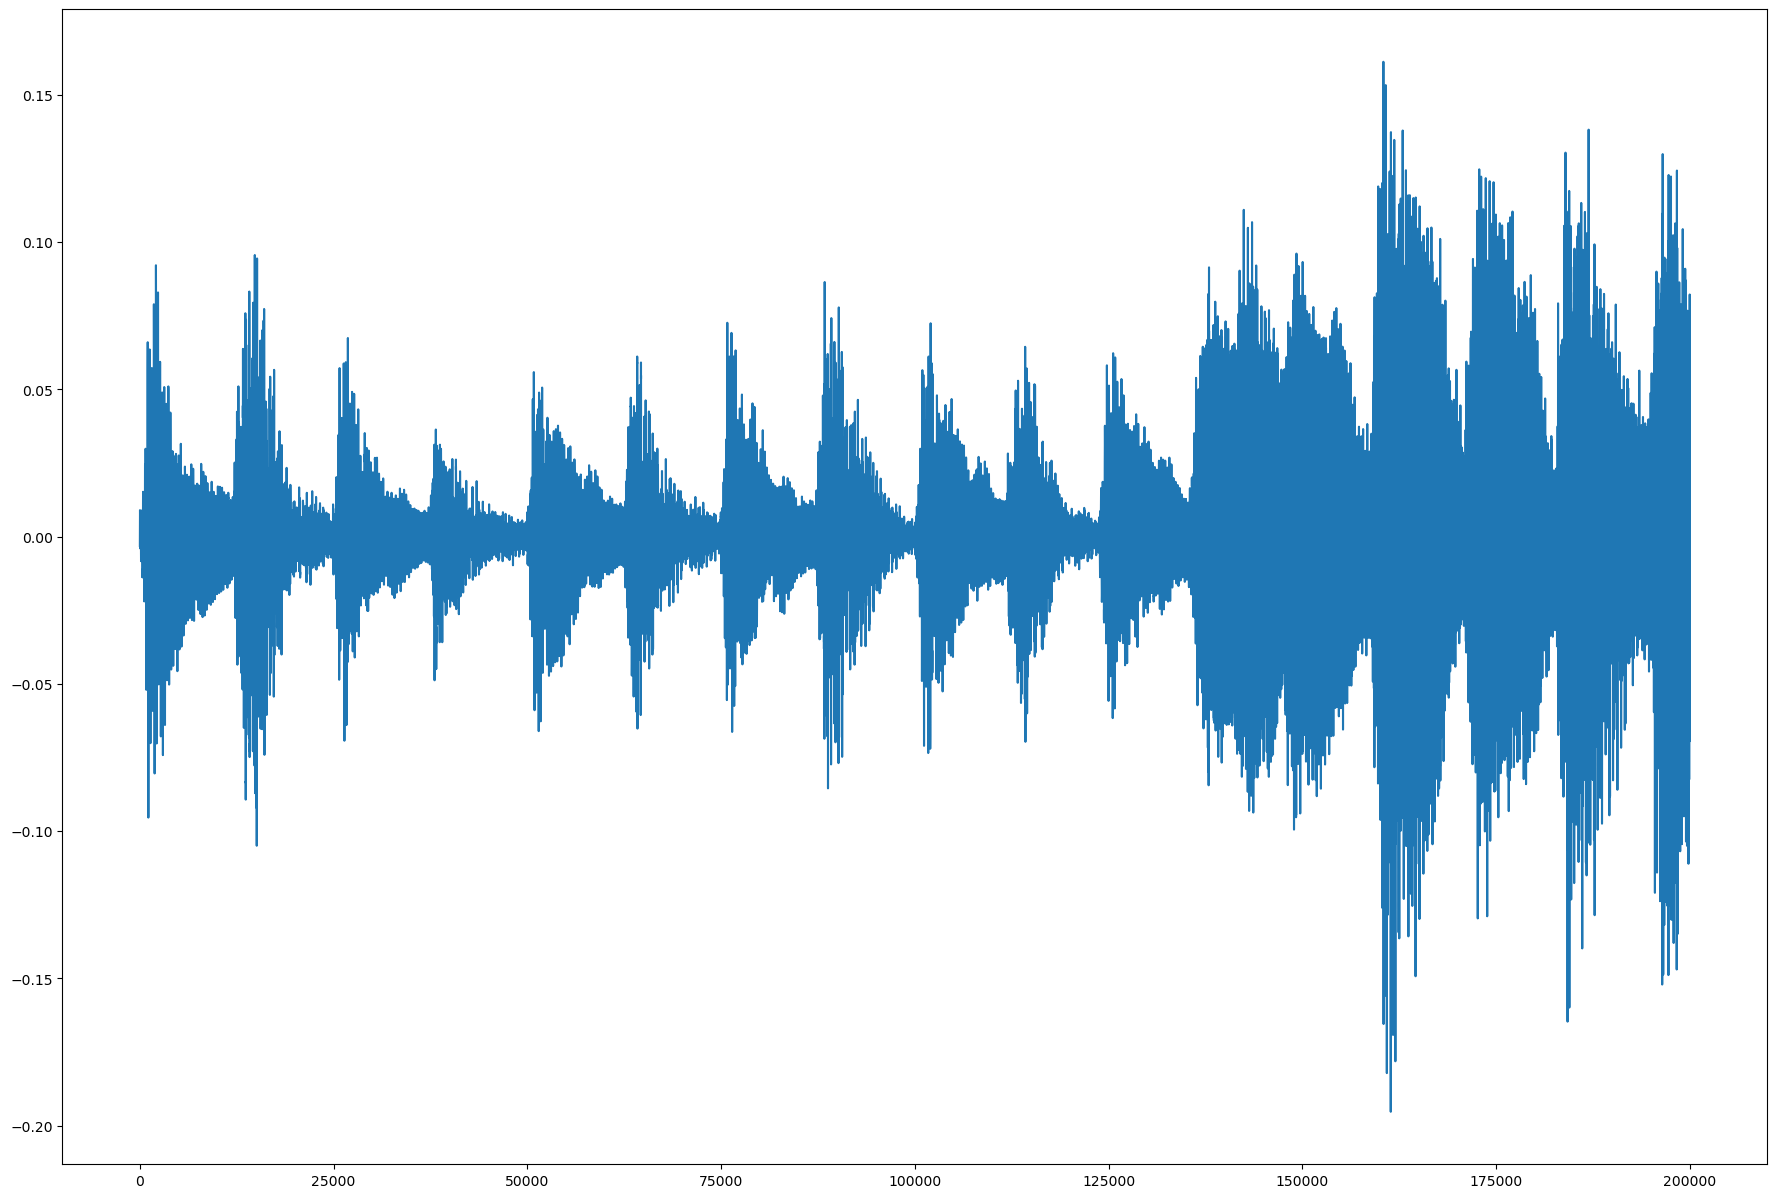

In [11]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import math

filename = librosa.example('nutcracker', hq=True)
N1 = 22050
N2 = 16000
x, sr = librosa.load(filename, sr=N1)
print(len(x))
x = x[100000:300000]
fig, ax = plt.subplots(figsize=(22,15))
plt.plot(x)

## Растяжение

In [12]:
xbar = np.empty(shape=int(N2 * len(x)))
x_last = 0
for j in range(len(xbar)):
    if j % N2 == 0:
        xbar[j] = x[j // N2]
        x_last = xbar[j]
    else:
        xbar[j] = x_last

## Фильтрация

In [13]:
b, a = signal.butter(3, 0.46)
ybar = signal.lfilter(b, a, xbar)

## Прореживание

In [14]:
y = np.zeros(shape=int(len(ybar) / N1))
print(y.size)

for j in range(y.size):
    y[j] = xbar[j * (N1)]

145124


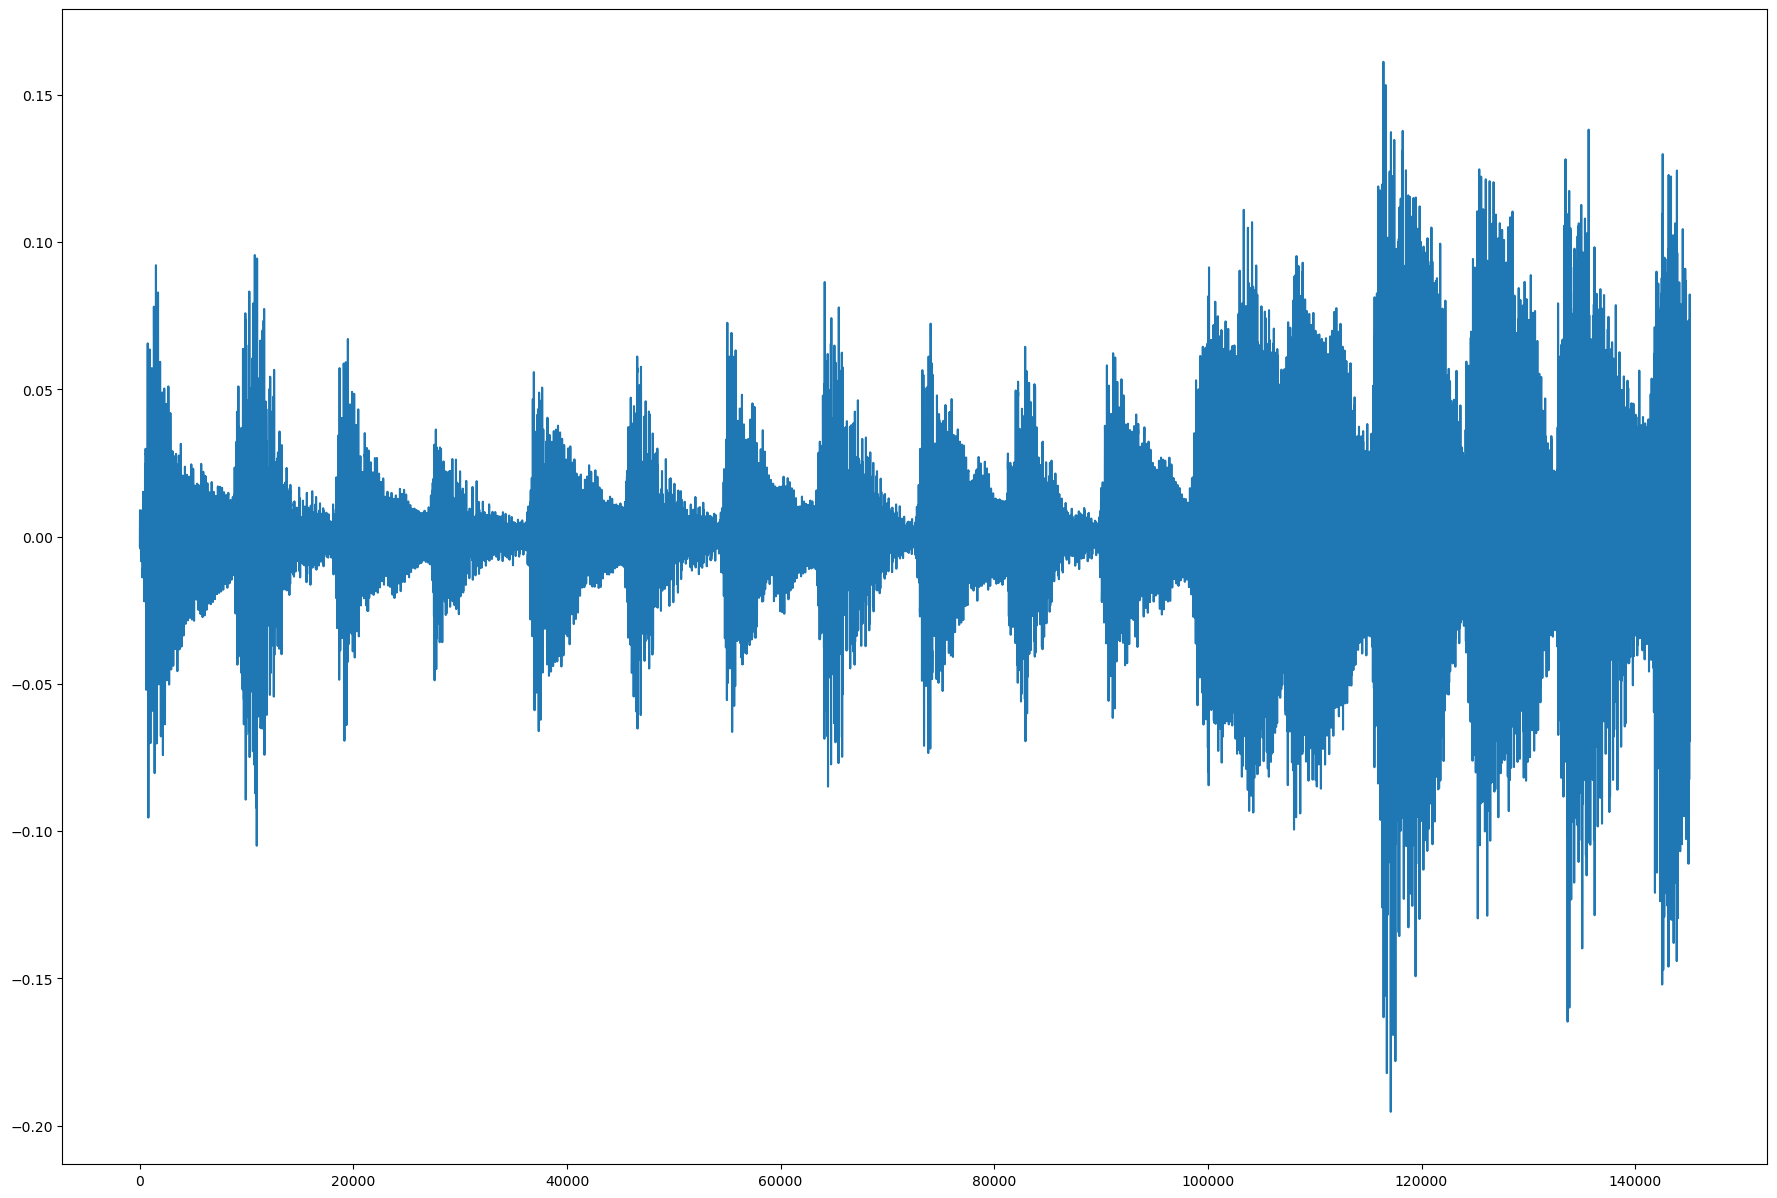

In [15]:
fig, ax = plt.subplots(figsize=(22,15))
plt.plot(y)

## Проверка с методом resample

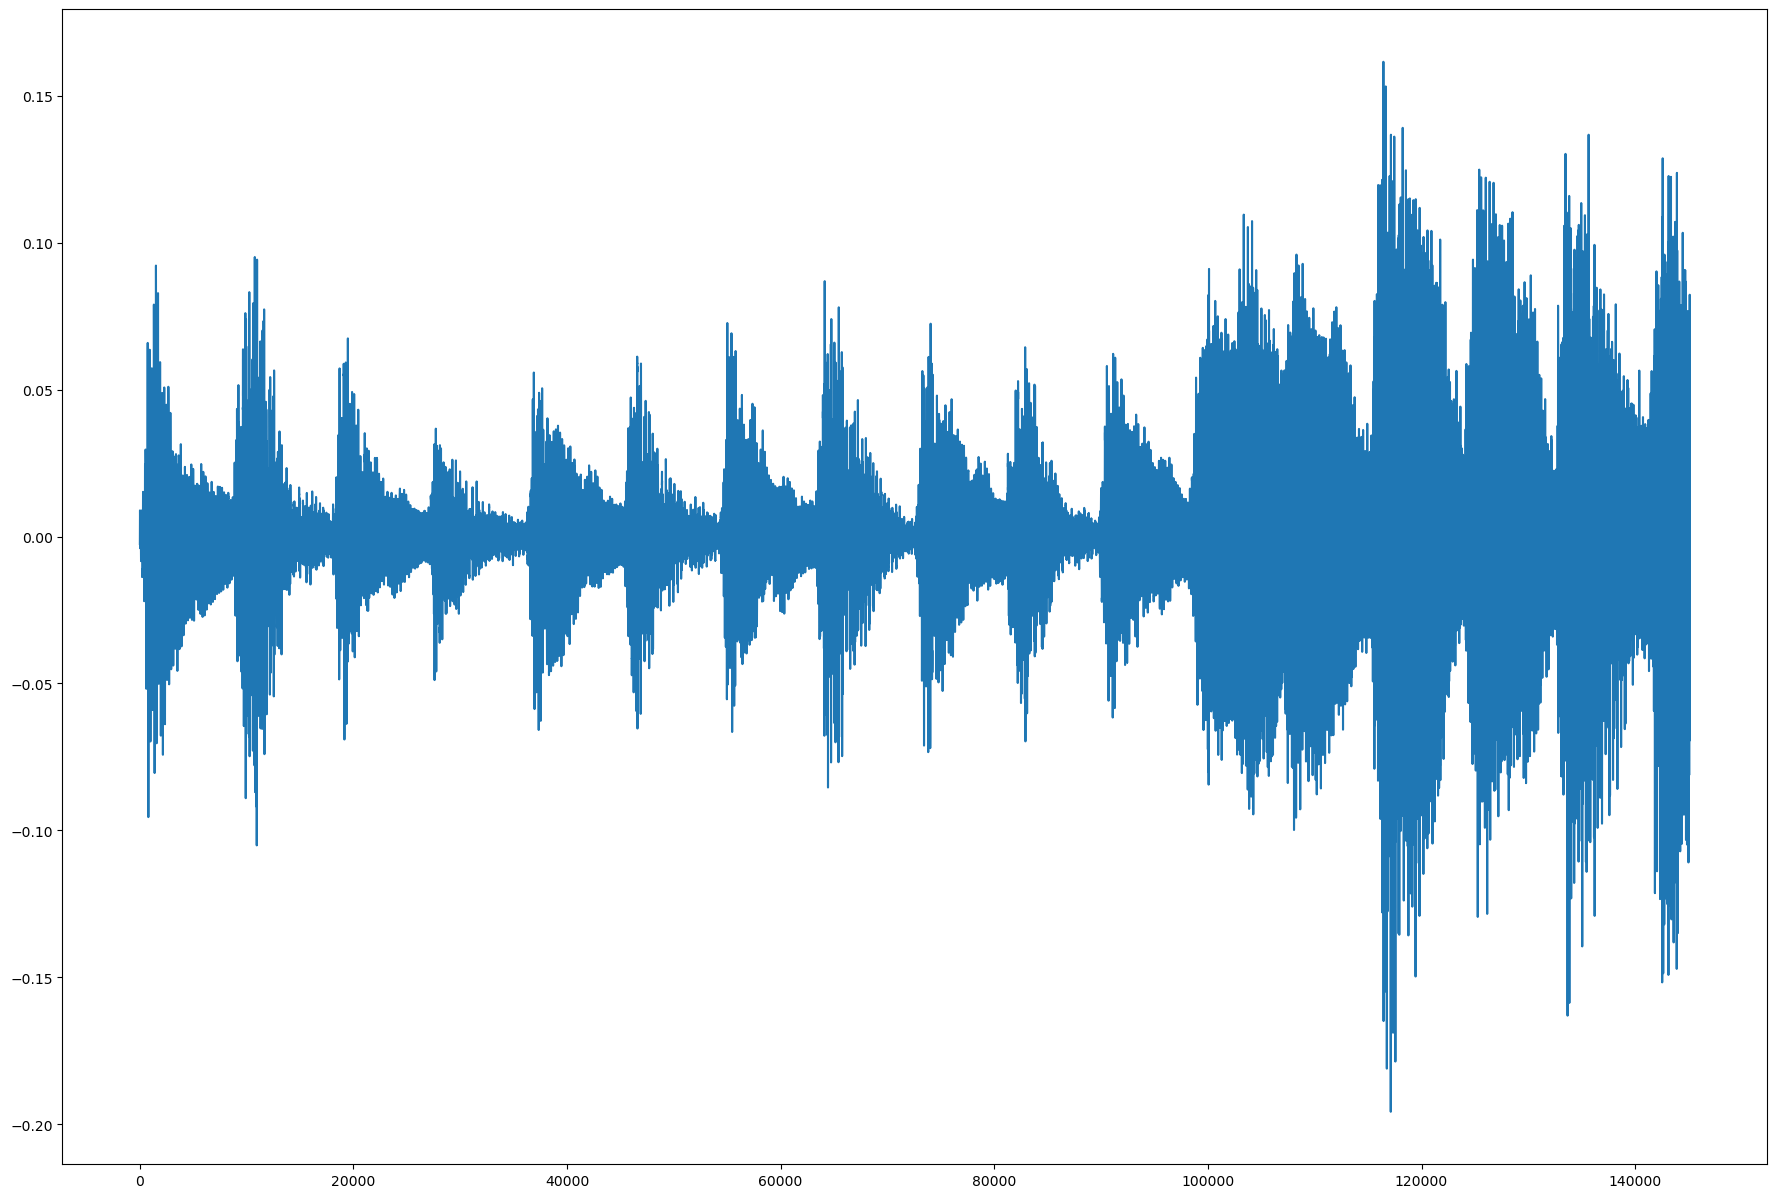

In [16]:
xtest = librosa.resample(x, orig_sr=N1, target_sr=N2)
fig, ax = plt.subplots(figsize=(22,15))
plt.plot(xtest)

In [17]:
from IPython.display import Audio
Audio(data=x, rate=N1)

In [18]:
Audio(data=y, rate=N2)